In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline
%load_ext autoreload
%autoreload 1

%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
matplotlib.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic')

In [28]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)

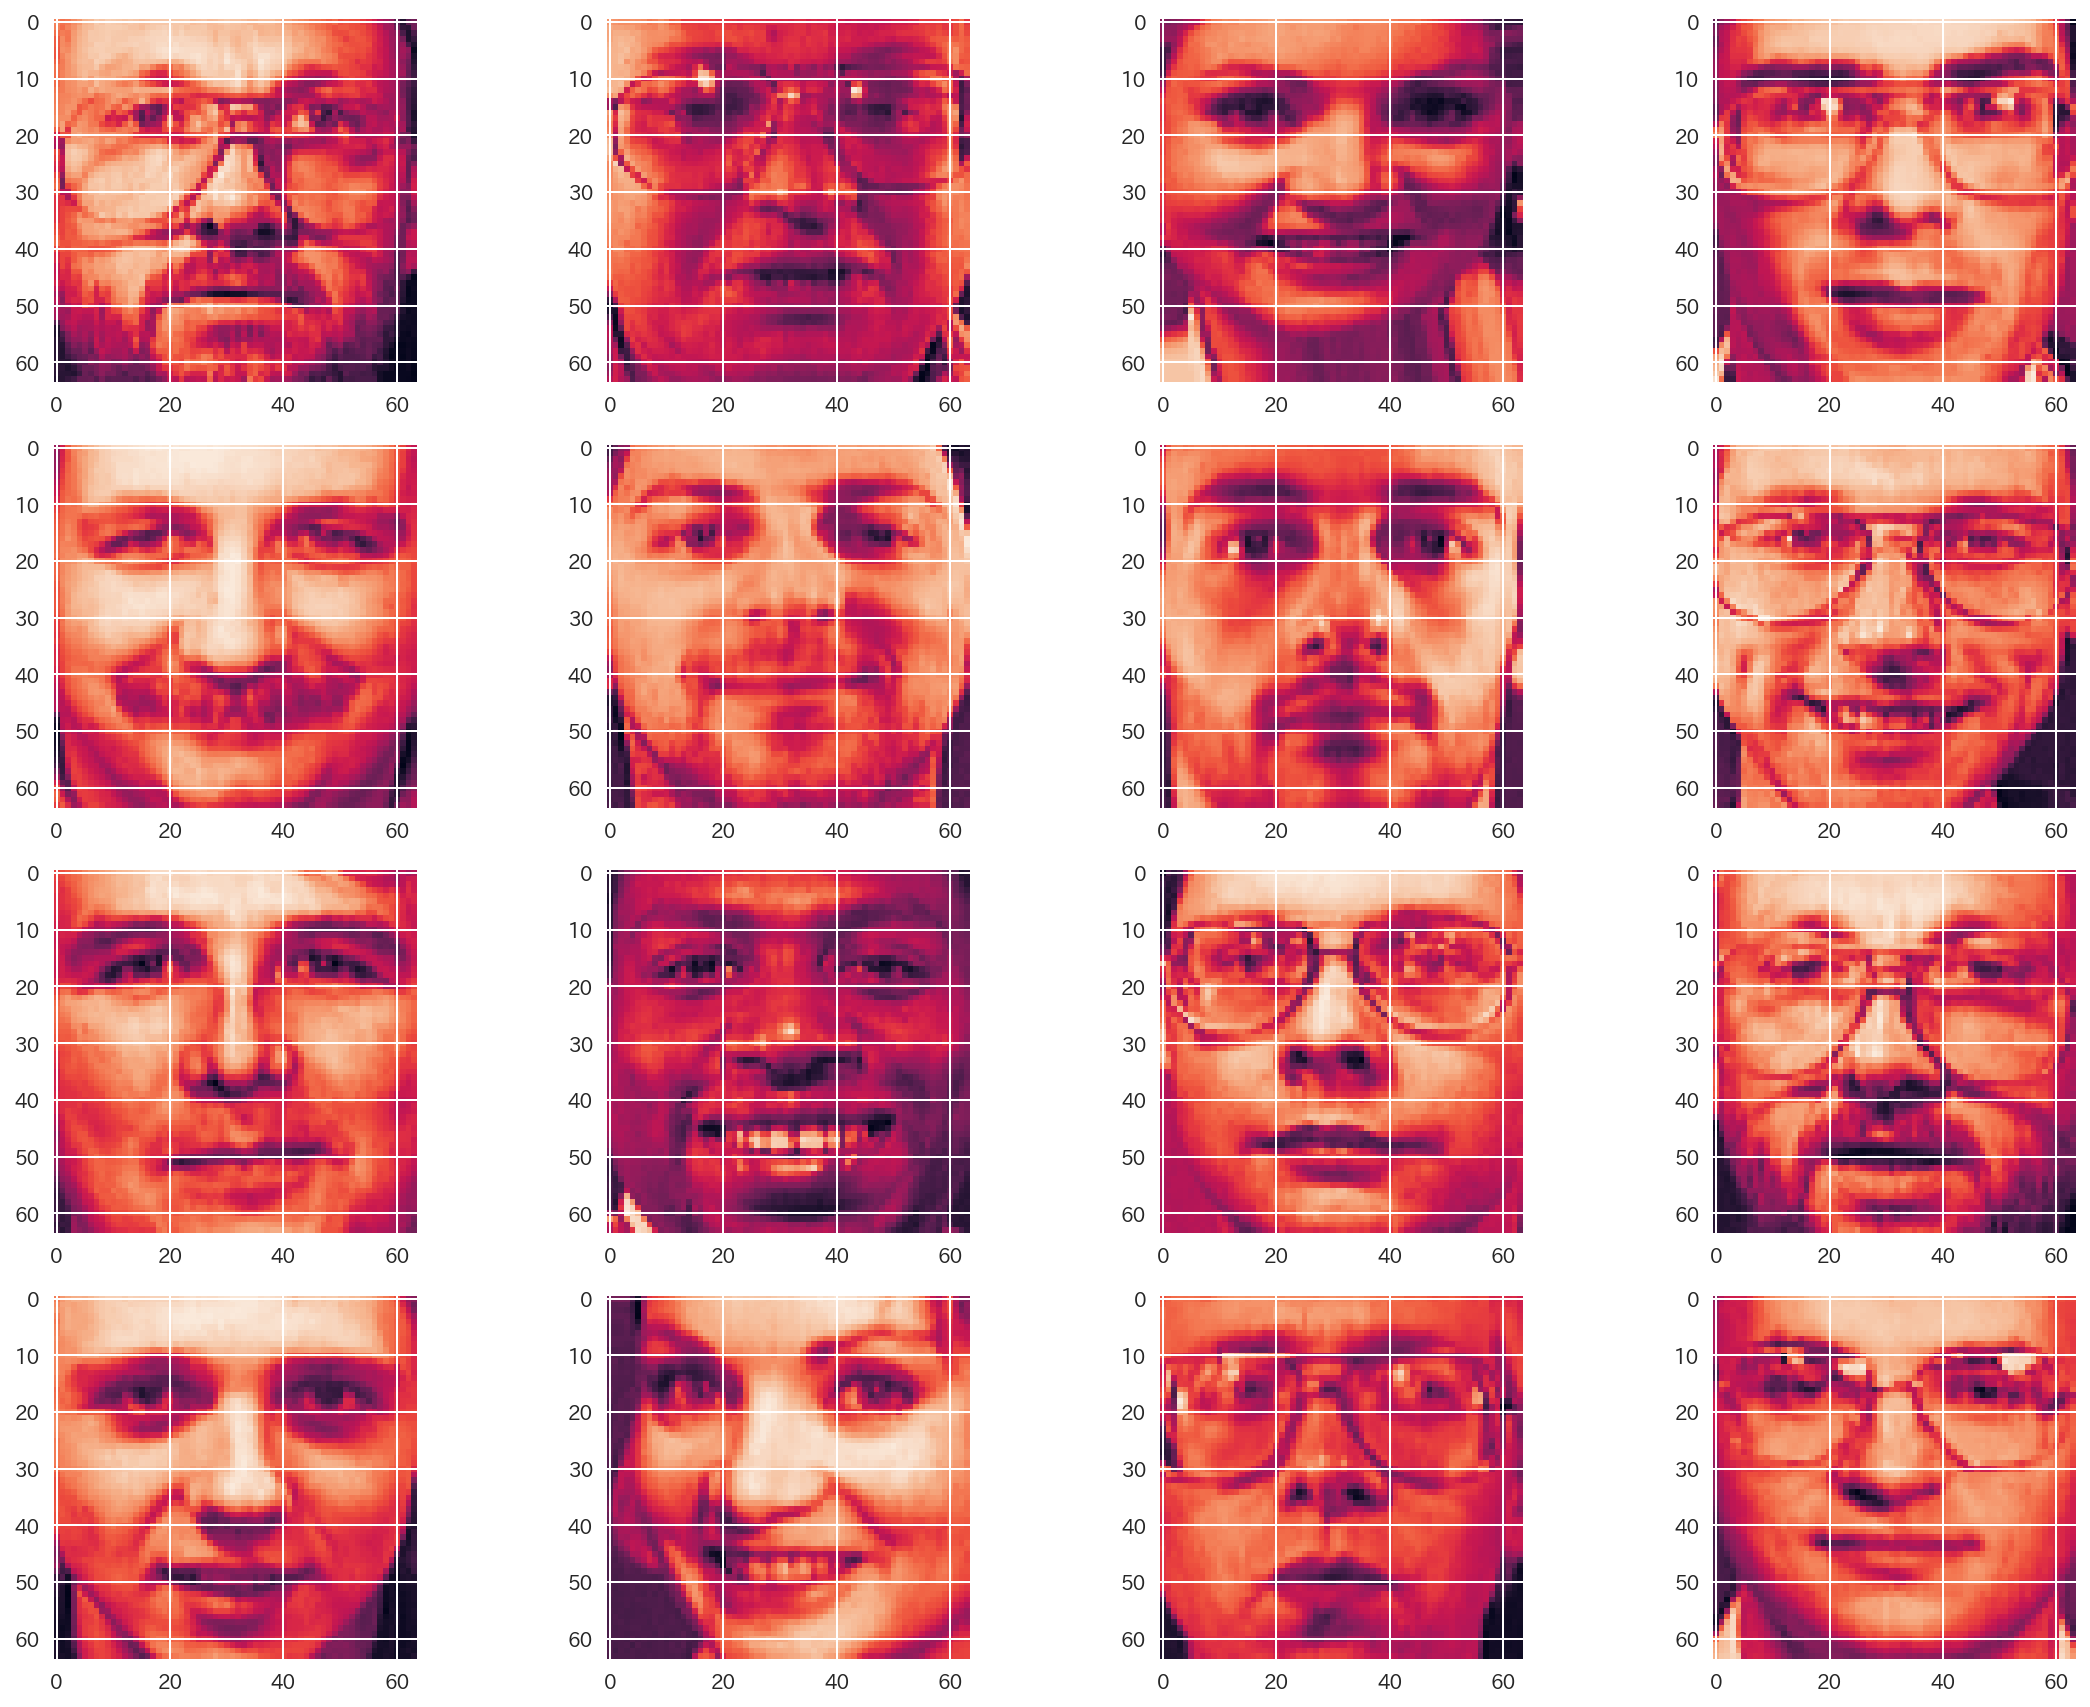

In [30]:
import math

faces = dataset.data
plt.figure(figsize=(16,12))

n_col = 4
num = 16
n_row = math.ceil(len(faces[:num]) / n_col)
image_shape = (64, 64)

for i, im in enumerate(faces[:num]):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

# 行列分解

In [42]:
# 下準備
n_train = int(len(faces) * 0.8)
X_train, X_test = faces[:n_train], faces[n_train:]

# 基底数
n_components=24

## PCA

[0.23870717 0.14735925 0.07878073 0.05120235 0.03570193 0.03012213
 0.02390529 0.02165355 0.01941589 0.01696475 0.01584494 0.01487441
 0.01245381 0.01177399 0.01080236 0.01028309 0.00882162 0.00834793
 0.00758096 0.00715672 0.00678931 0.00607857 0.0059143  0.00583551]
0.7963705561123788
CPU times: user 13.2 s, sys: 5.69 s, total: 18.9 s
Wall time: 14.2 s


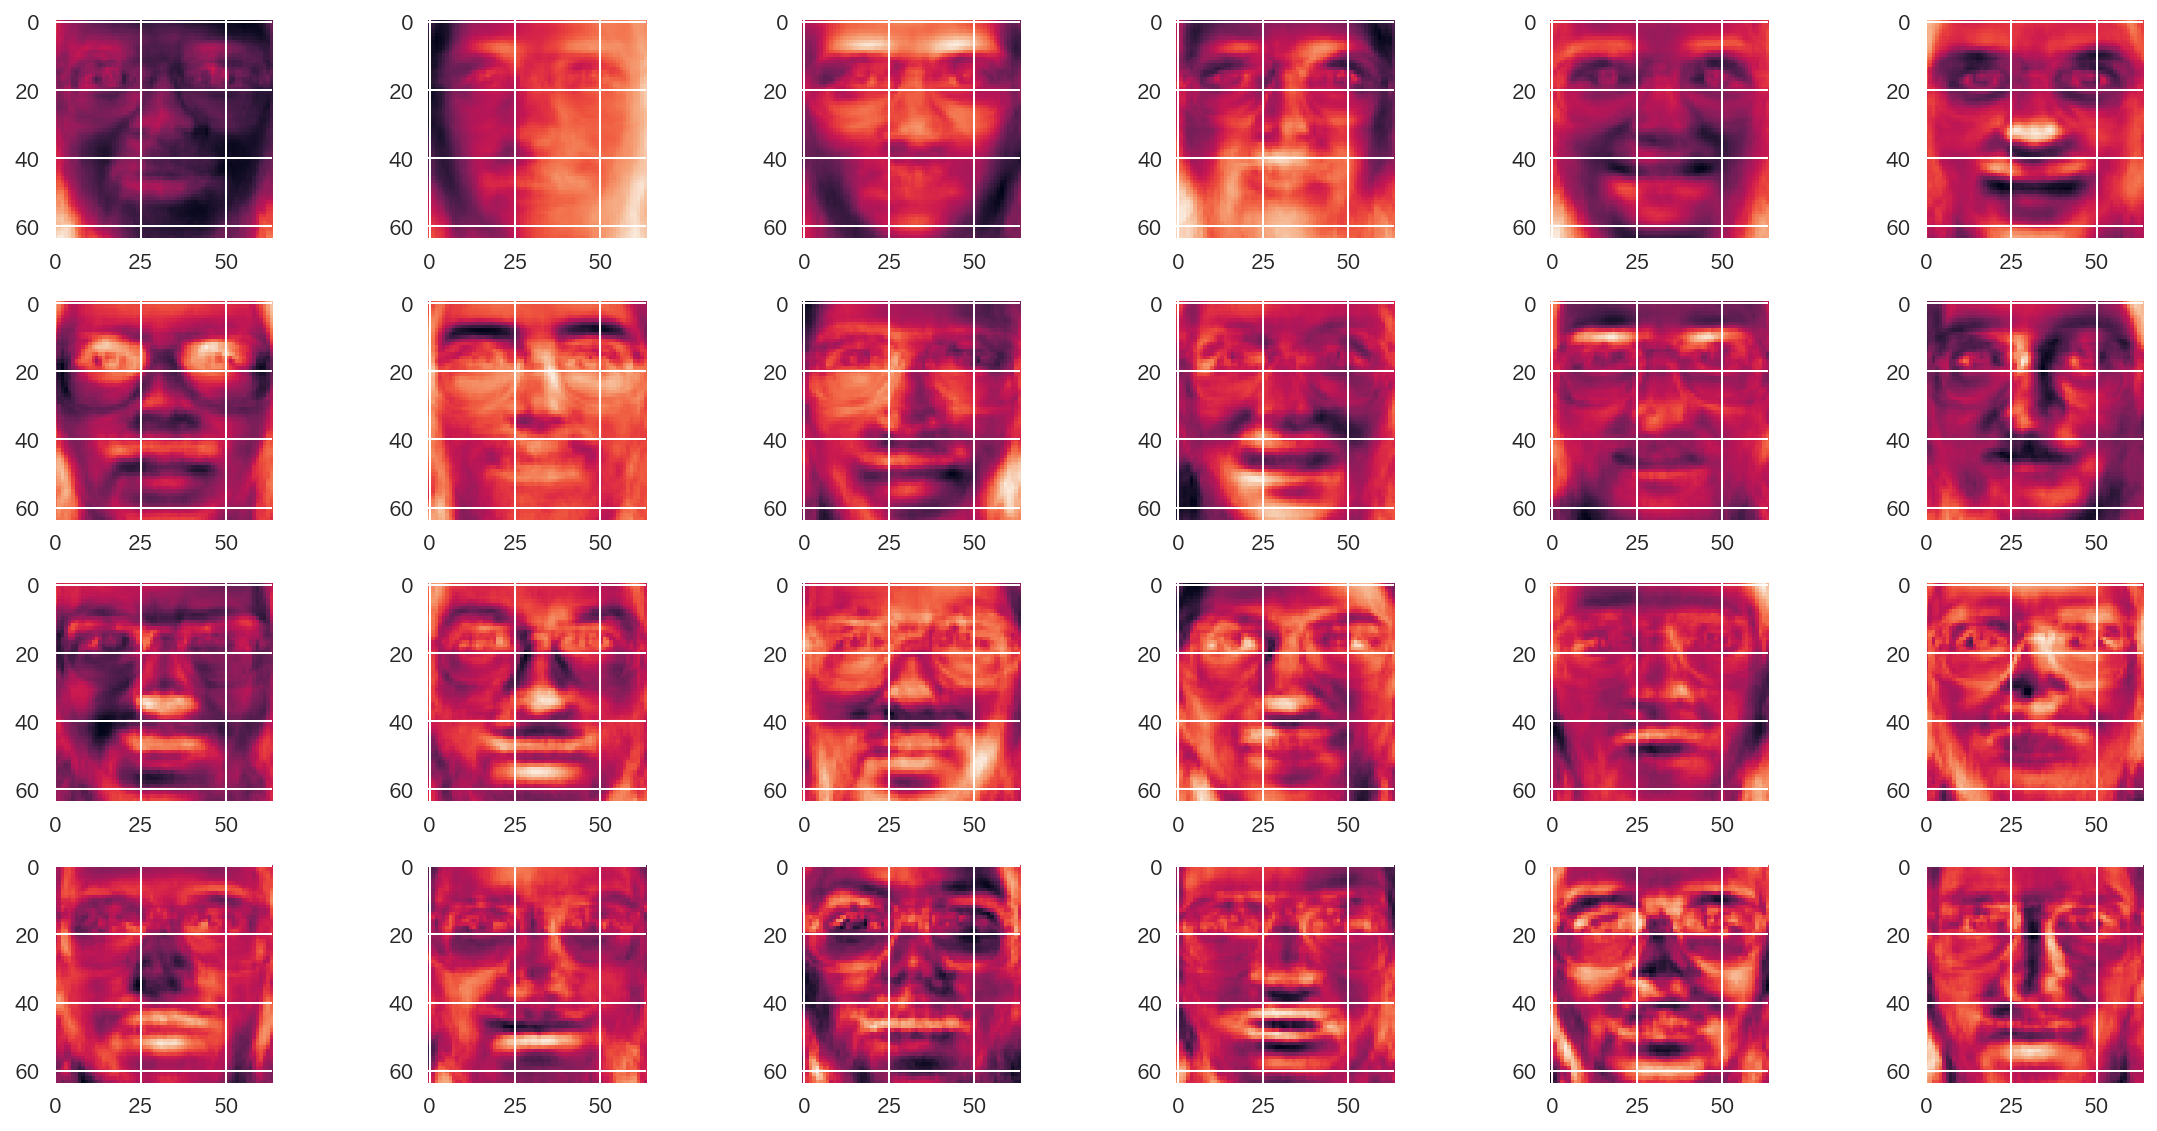

In [45]:
%%time

from sklearn.decomposition import PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)
print(f'{pca.explained_variance_ratio_}')
print(f'{sum(pca.explained_variance_ratio_)}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(pca.components_) / n_col)

# 基底の表示
for i, im in enumerate(pca.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

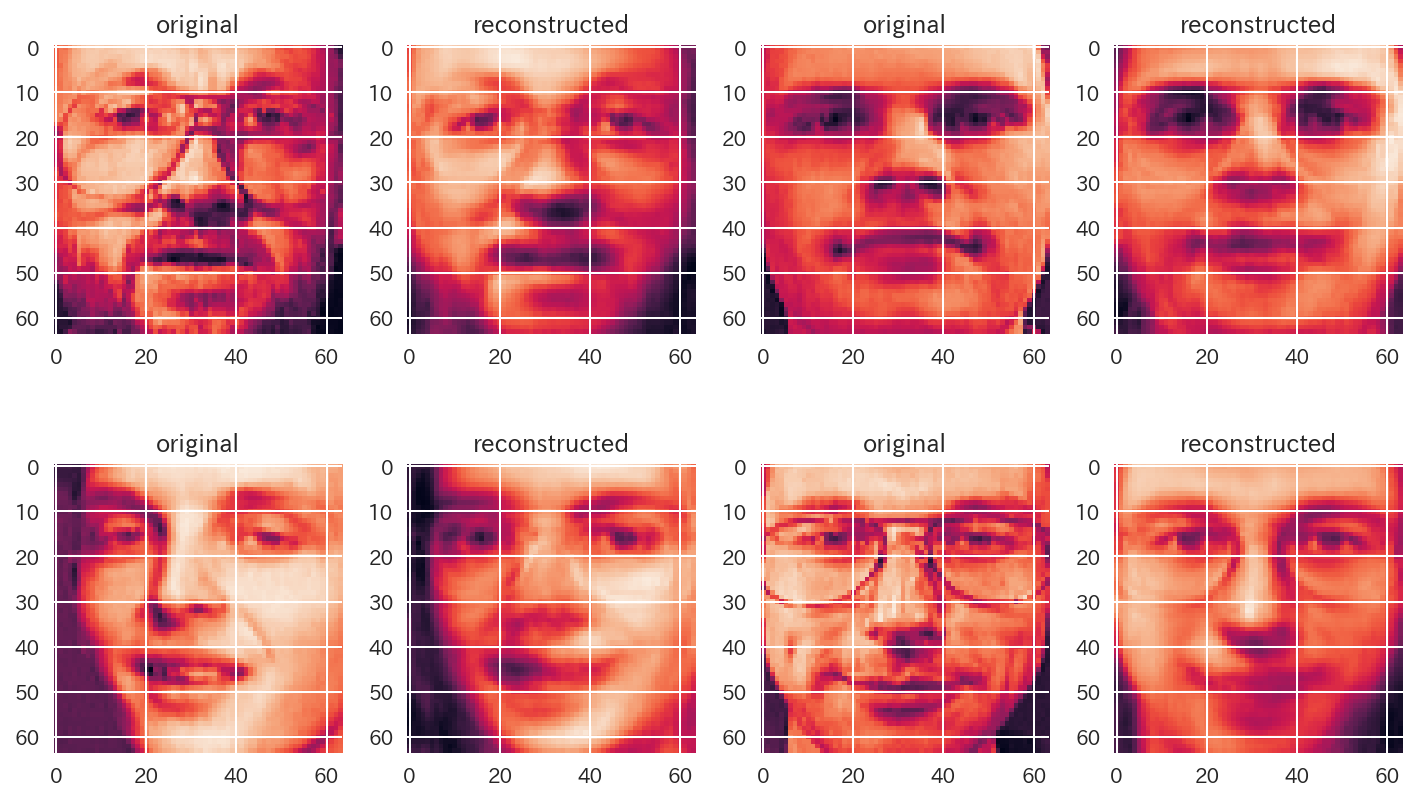

In [70]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = pca.transform(sample.reshape(1, -1))
    reconstructed = pca.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()

# ICA

CPU times: user 2.22 s, sys: 810 ms, total: 3.03 s
Wall time: 2.04 s


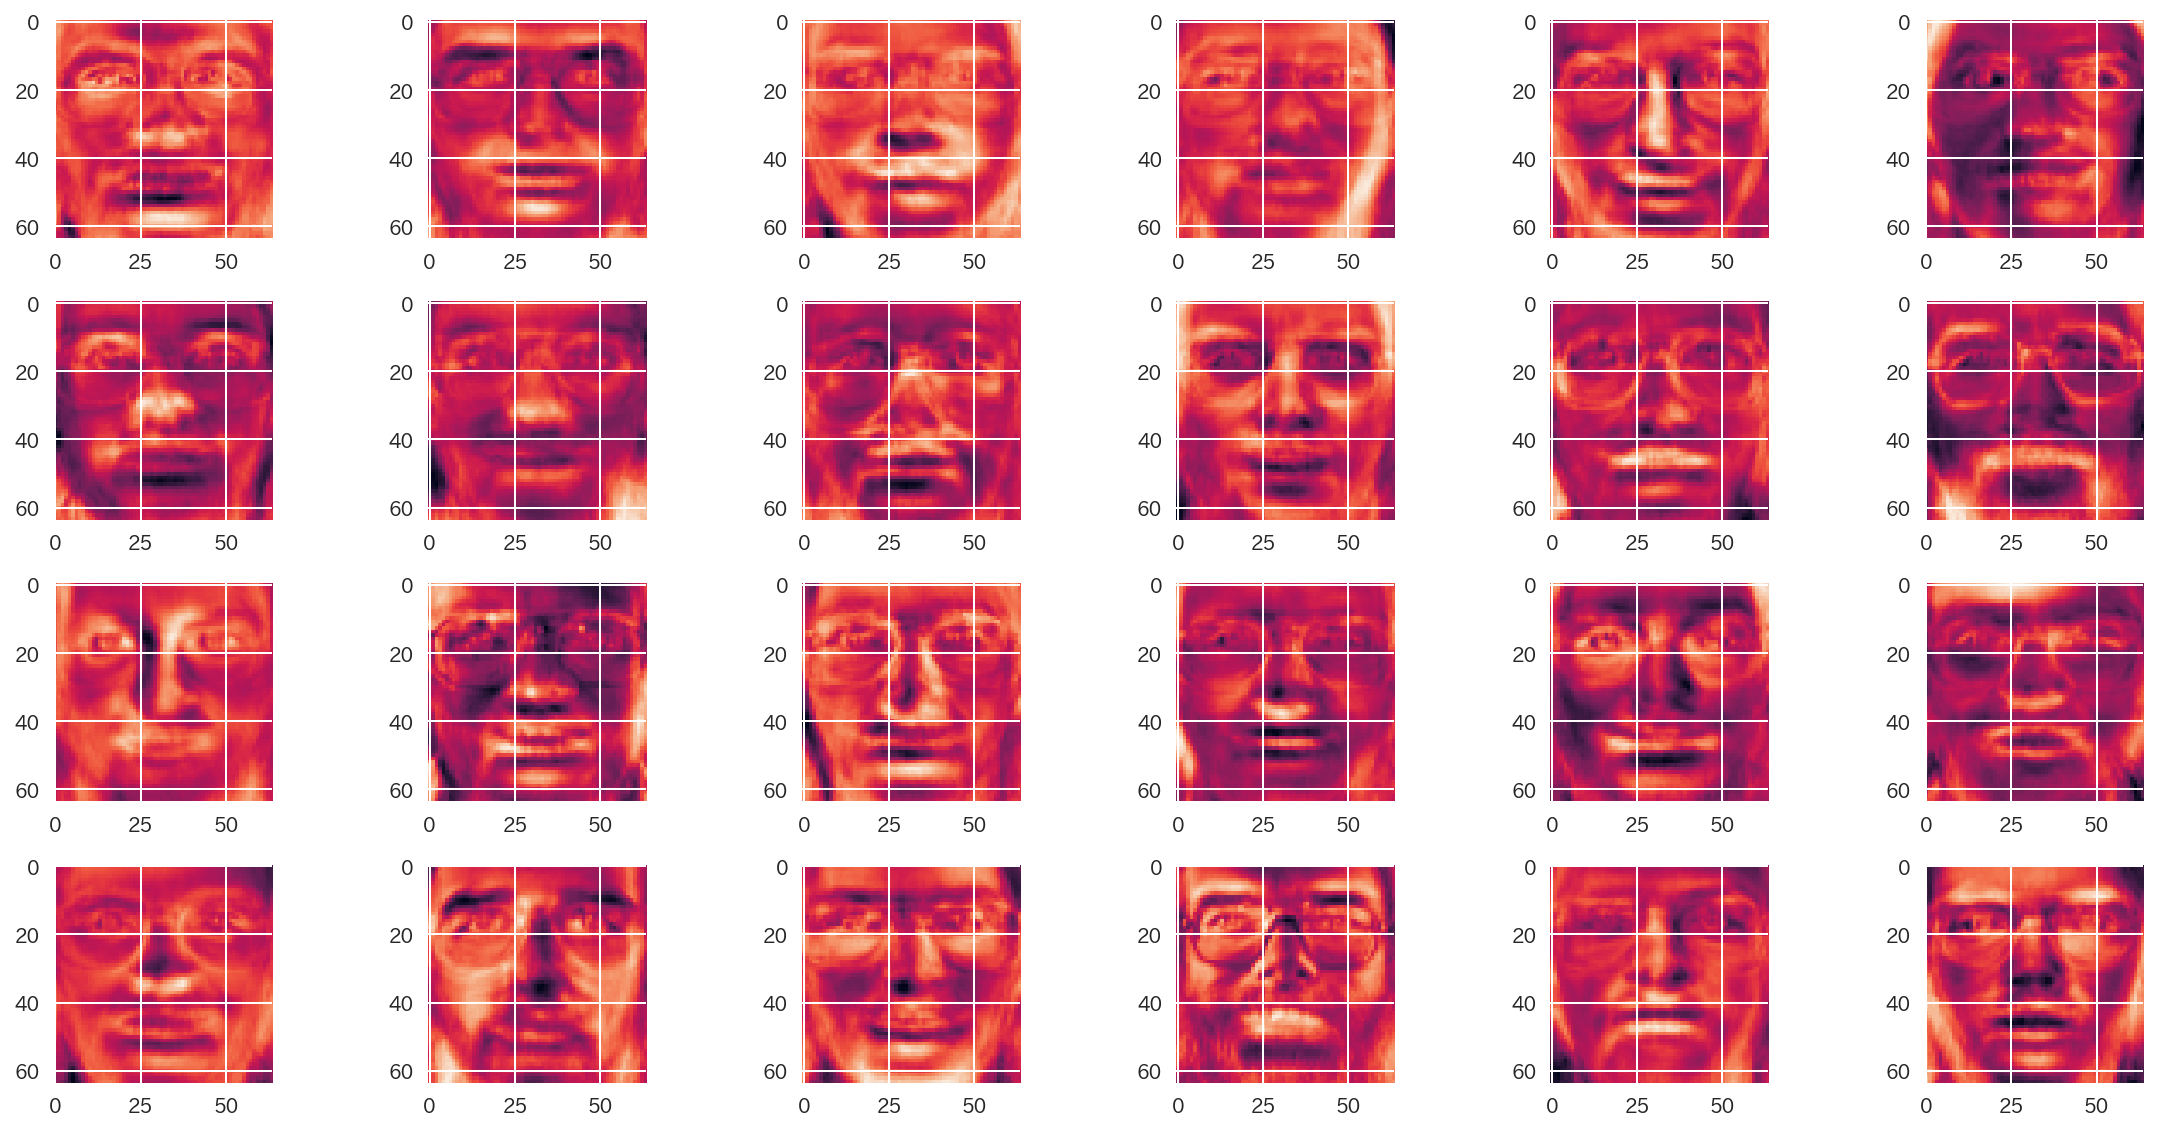

In [94]:
%%time

from sklearn.decomposition import FastICA
ica = FastICA(n_components=n_components, whiten=True)
ica.fit(X_train)
# print(f'{pca.explained_variance_ratio_}')
# print(f'{sum(pca.explained_variance_ratio_)}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(ica.components_) / n_col)

# 基底の表示
for i, im in enumerate(ica.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

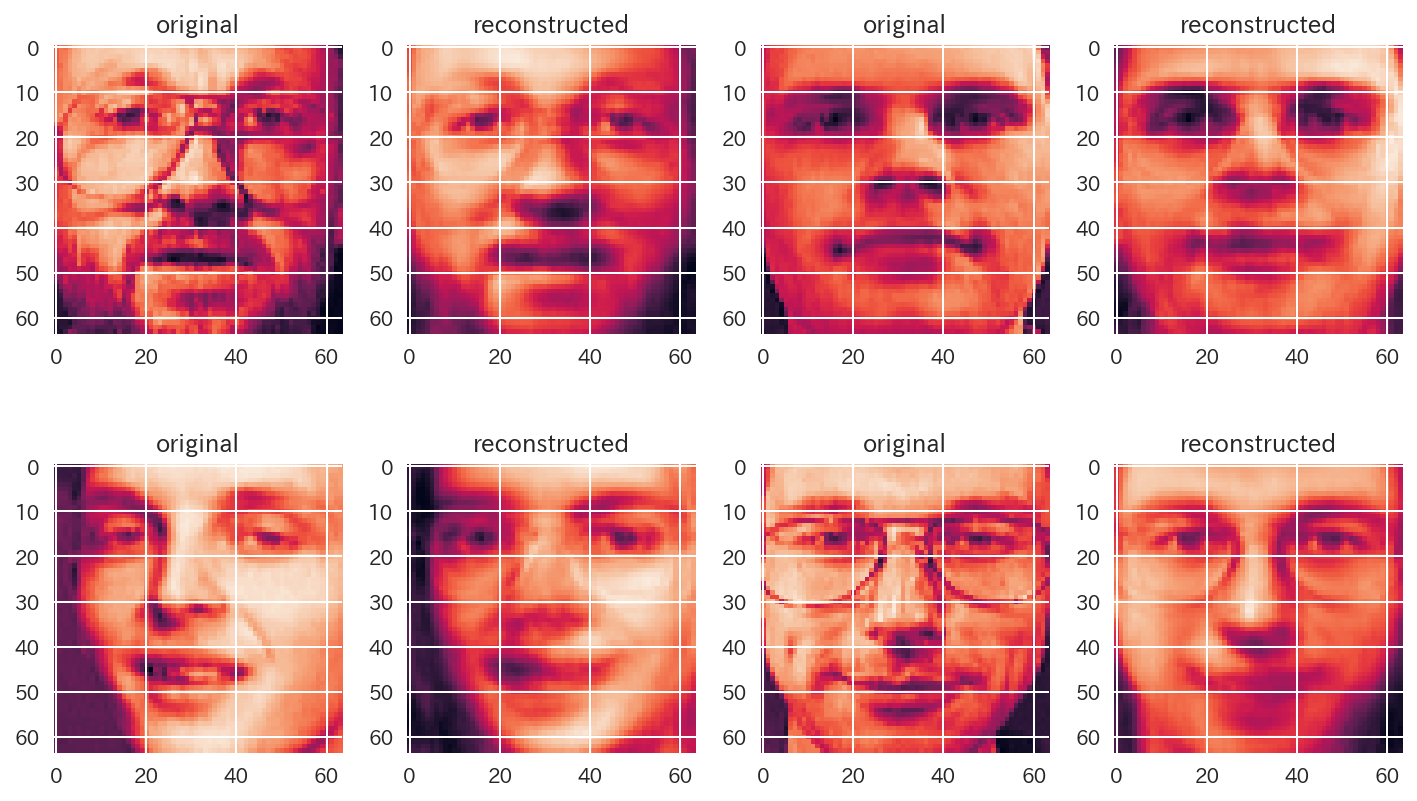

In [95]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = ica.transform(sample.reshape(1, -1))
    reconstructed = ica.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()

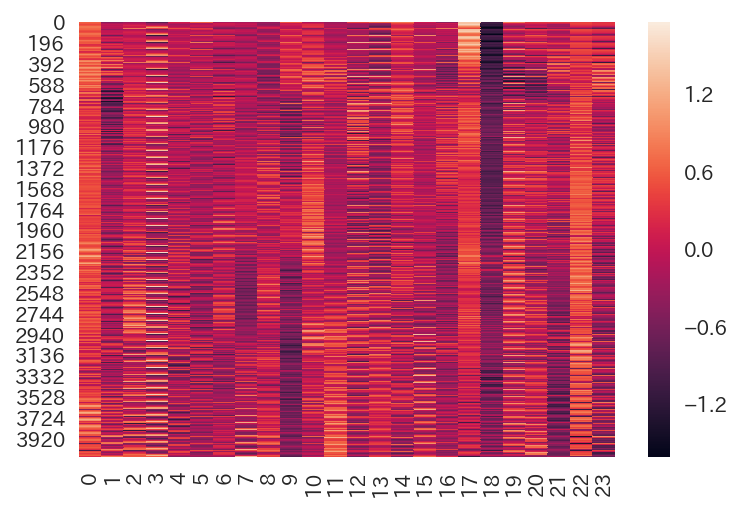

In [97]:
sns.heatmap(ica.mixing_)

## NMF

74.66439417000628
CPU times: user 7.25 s, sys: 2 s, total: 9.25 s
Wall time: 5.49 s


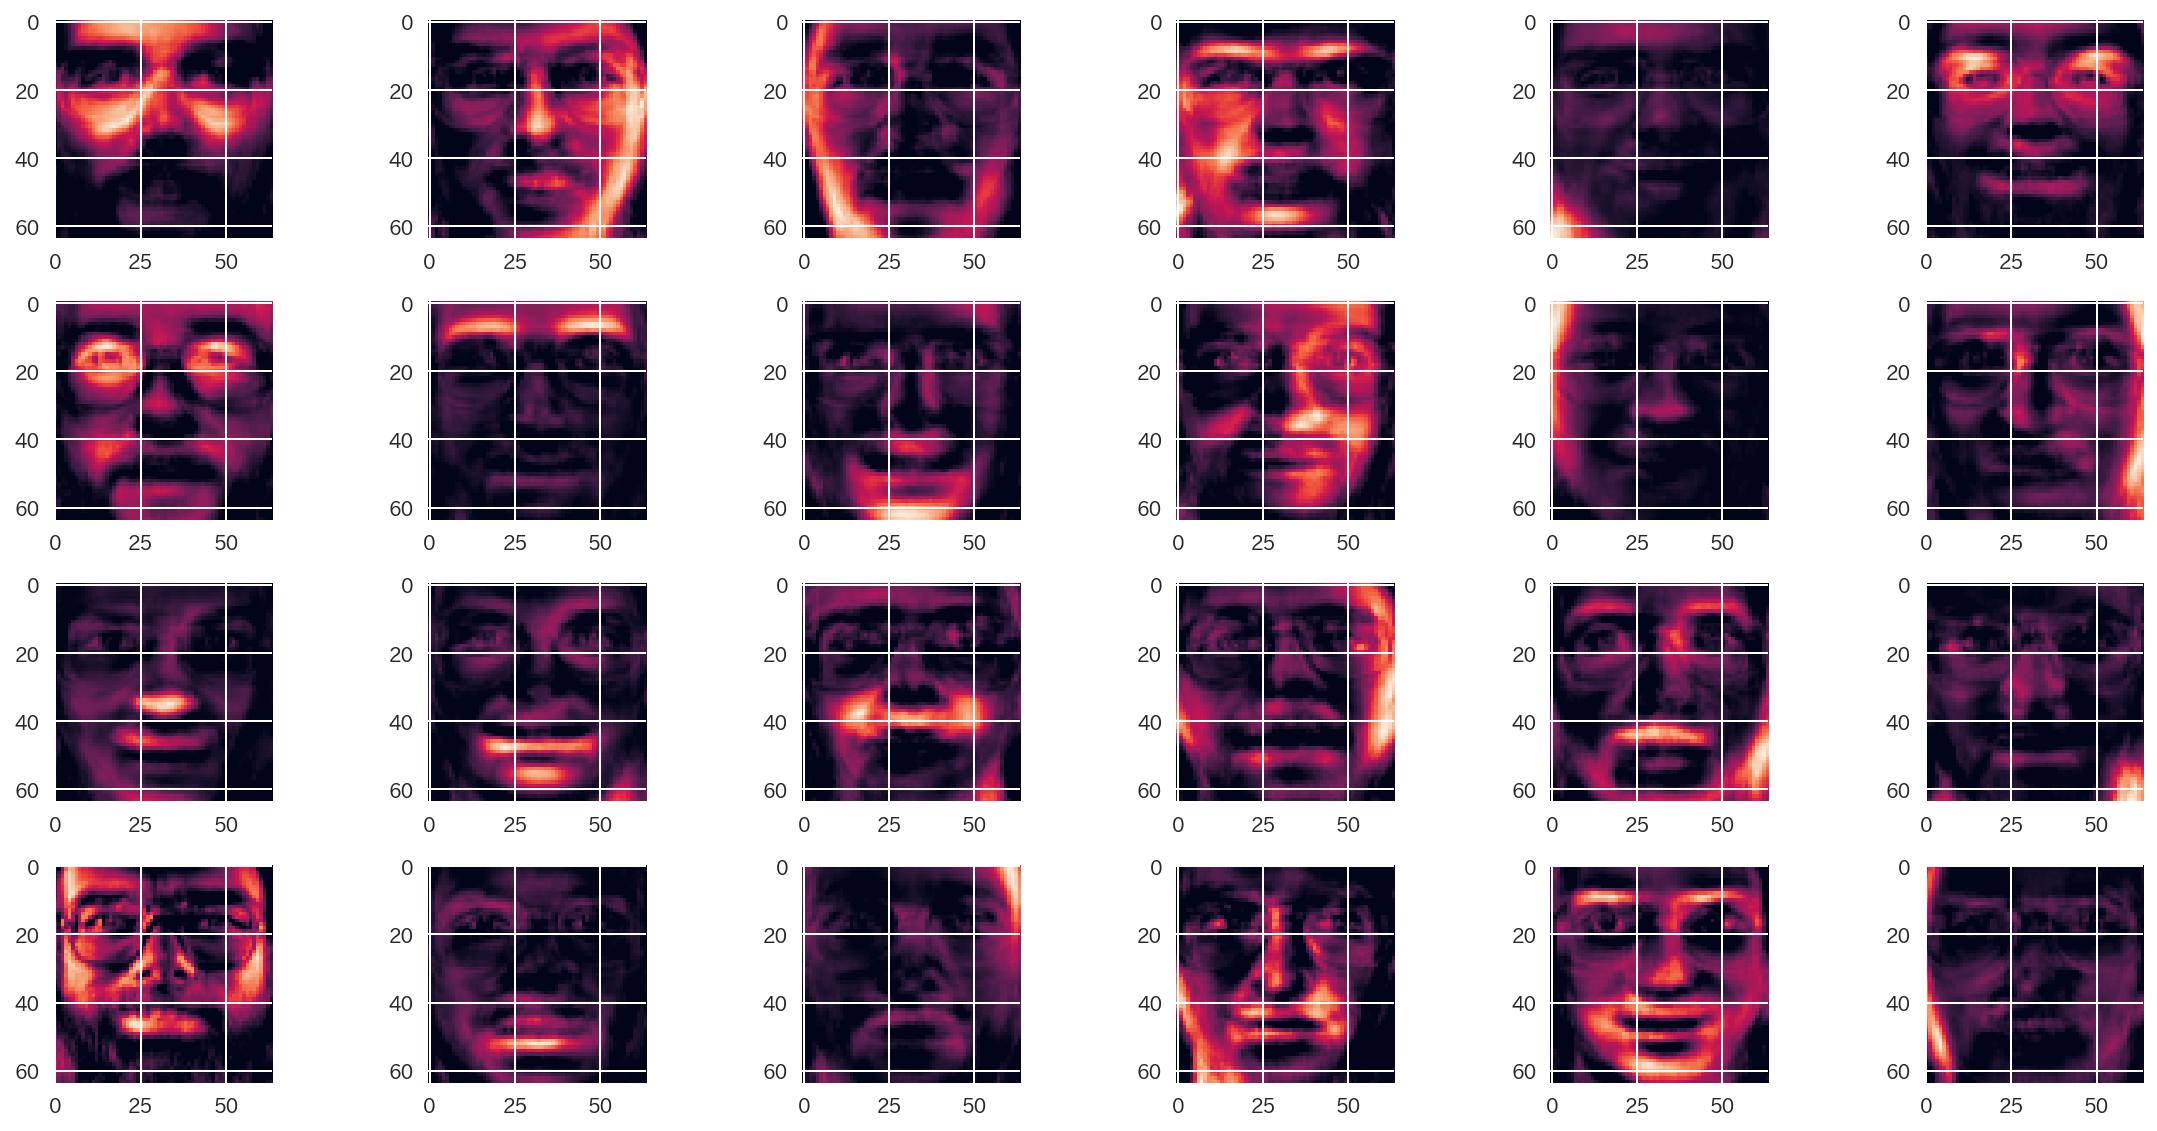

In [93]:
%%time
from sklearn.decomposition import NMF
nmf = NMF(n_components=n_components, max_iter=200)
W = nmf.fit_transform(X_train)
H = nmf.components_

print(f'{nmf.reconstruction_err_}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(pca.components_) / n_col)

# 基底の表示
for i, im in enumerate(nmf.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

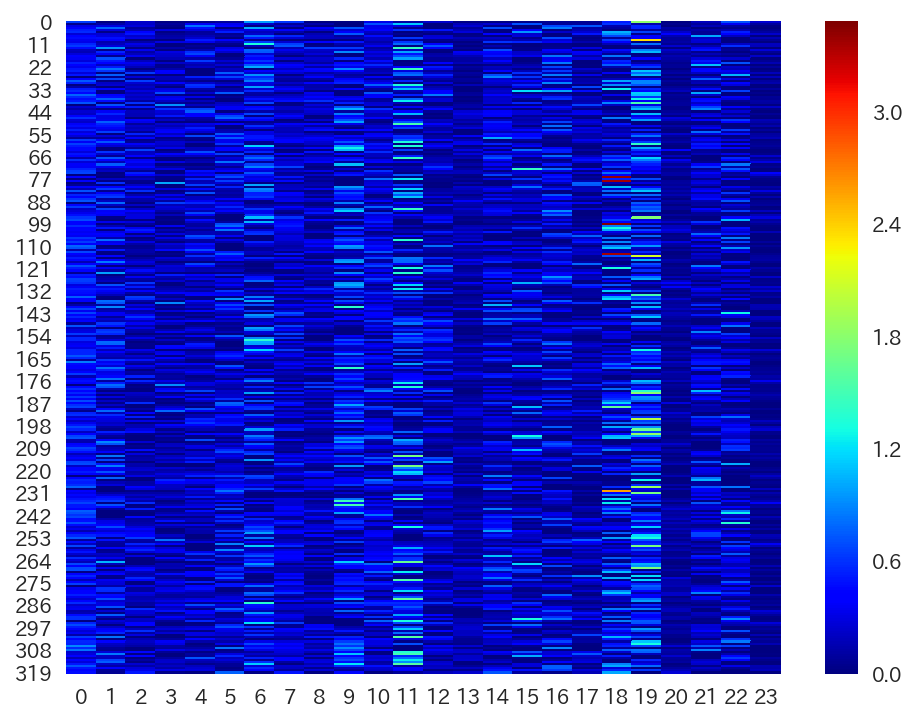

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(W, cmap='jet')

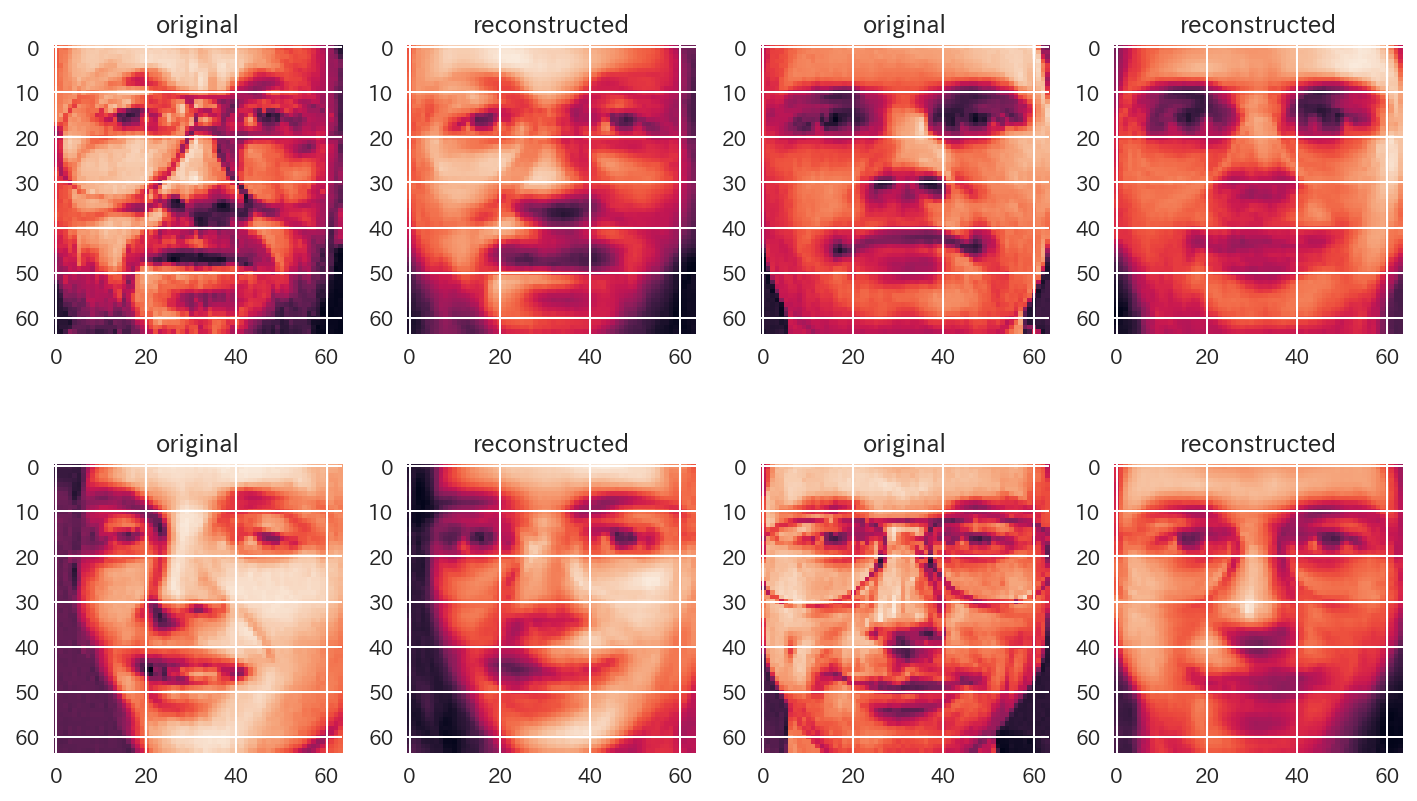

In [86]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = nmf.transform(sample.reshape(1, -1))
    reconstructed = nmf.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()

In [87]:
nmf2 = NMF(n_components=16*16, max_iter=200)
W2 = nmf2.fit_transform(X_train.T)
H2 = nmf2.components_